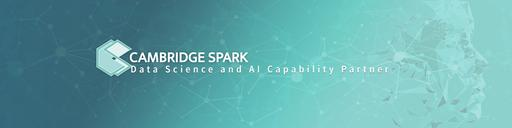

# Visualisation In Python

# Introduction to Data Visualisation
## Creating data graphics with Python


__Learning objectives:__

- Be able to visually summarise and present the results of data analysis to a range of stakeholders and make recommendations based on data-driven insights. 
- Develop charts using some of the most widely used visualisation libraries in Python such as Matplotlib and Seaborn. 
- Use Bokeh to create high impact, interactive, readily-sharable visualisations and dashboards.
- Create web-based, interactive dashboards in Jupyter notebooks using Panel.

### What is data visualisation?

The simultaneous use of **words**, **numbers** and **pictures** to **communicate information**.

### What are the goals of data visualisation?

- show the data in a **coherent** and **undistorted** manner
- provide both an **overview** and visibility of the **detail**
- serve a clear **purpose** and encourage **comparison**
- draw **attention** to the data rather than the graphic

*The purpose of data visualisation is to  **reveal** insights into the data.*

#### Example: Anscombe's Quartet
 
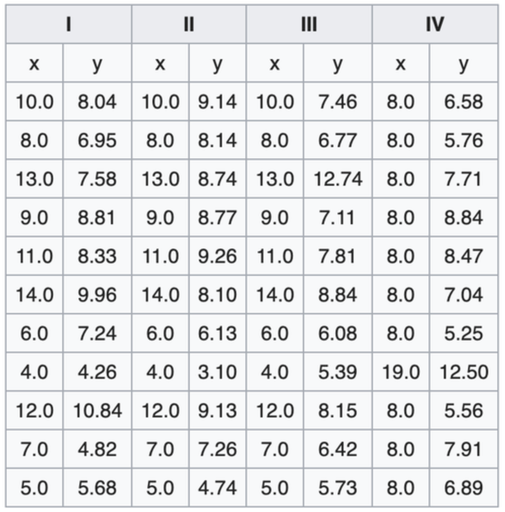

The table of numbers reveals little about the nature of each dataset and numerous **statistical properties are identical** for all of them: 
- **Mean** of both x and y
- Sample **variance** of both x and y
- **Correlation** between x and y
- Linear **regression** line
    
*The following charts reveal the nature of each of the datasets much more clearly.*

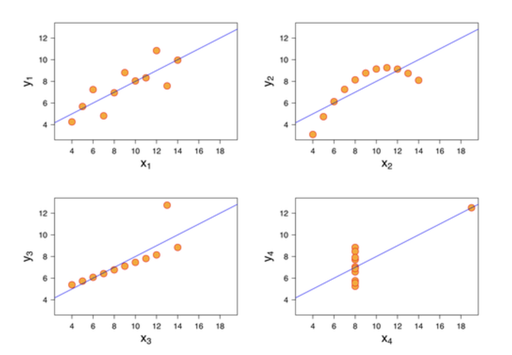

Anscombe's Quartet reveals data analysis on it's own may not be enough to derive insights from data. Data visualisation / data exploration can be used as a tool for both communication *and* discovery.

### Types of plot and when to use them

- What kind of data do I want to visualise?
- What types of plot are suitable?
- What information should be revealed?

We will use the **pandas** `.plot()` method to create examples of some of the most common chart types, having created a **DataFrame** from `factbook.csv` and assigned it to `df`:

In [ ]:
import pandas as pd
df = pd.read_csv('data/factbook.csv', sep=';')

We will discuss the `.plot()` method syntax in more detail later on.

In [ ]:
import seaborn as sns
sns.set(palette='deep')

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

### Scatter plots

In [ ]:
df.plot(x='Birth rate(births/1000 population)', 
        y='Infant mortality rate(deaths/1000 live births)', 
        kind='scatter');

### Scatter plots

- `x` and `y` in our DataFrame need to contain numerical values
- **Continuous** variables are more suitable than **discrete** variables
- Multiple data points with similar values can **obscure** one another
    - Consider using **jitter** when plotting discrete variables. Jitter is an addition of a **small random value** to each, so that datapoints are not plotted directly on top of one another

Example jitter:

`import numpy as np
df["Infant mortality rate(deaths/1000 live births)"] = df["Infant mortality rate(deaths/1000 live births)"] + np.random.normal(0, 0.5, size=len(df["Infant mortality rate(deaths/1000 live births)"]))`

#### Scatter plots

- Easily spot **correlations** between two variables
- Size and shape of dots can represent additional variables
- Useful for identification of **outliers**
- Extreme outliers can result in large amounts of **empty space** in the plot
- Caveat: People may have a tendency to **identify patterns** even in random data

### Histograms

In [ ]:
df['GDP - per capita'].plot(kind='hist', bins=3);

In [ ]:
df['GDP - per capita'].max()

*Note how the bin boundaries are not exactly on increments of 20,000, but rather max 58900 / 3 = 19633.* 

### Histograms

- Plotted from a **Series** (or single column of a DataFrame) of **numerical values**
- If **bin width** or **bin boundaries** are important, consider creating a Series of **categorical** or **discrete** values and plotting a **bar chart** instead

For example in the plot above, the **bin boundaries may move** if the data changed; if we planned to reproduce this chart in future for comparison, it may be better to have three categories of income with a fixed range for each and create a **bar chart** instead.

### Histograms

- Visualise the **distribution** of **continuous** data
- Group numbers into **ranges** (on the x-axis)
- Column height shows the **frequency** (number of entries) for the given **bin** (group)
- Changing the number of bins can lead to **different conclusions** about the dataset (or make it difficult to draw any conlcusions at all)
- The y-axis should begin at **zero** so that the true differences in the **relative frequency** of the bins are revealed

### Bar charts

In [ ]:
def income_group(income):
    return 'Low' if income < 20000 else 'Medium' if income < 40000 else 'High'

df['Income group'] = df['GDP - per capita'].apply(income_group)
df['Income group'].value_counts().plot(kind='bar');

- We made a function with the logic for determining `Income group` based on `GDP - per capita` and used the `.apply()` method to create the new column in our DataFrame
- The `value_counts()` method produced a Series with and index containing each `Income group` and values showing the **frequency** of each

In [ ]:
films = pd.read_csv('data/films.csv')
genres = films.groupby(['Subject', 'Awards'])['Popularity'].mean()
genres.unstack().sort_values(by='No', ascending=False).plot(kind='bar');

- The `.groupby()` method here creates a **MultiIndex** DataFrame (the index has two columns - `Subject` and `Awards`)
- The values in the DataFrame are the `.mean()` of `Popularity` for each group
- The `.unstack()` method 'transposes' our DataFrame so that it now has a **single index column** and an **additional data column**
- Using `sort_values()` with a data column gives a **more meaningful orde**r to the x-axis categories (which would otherwise be in alphabetical order)

### Bar charts

- Compare **categorical** variables
- **Sub-groups** of categories can be segregated
- Sub-groups should be **directly comparable** (not different metrics relating to each catergory)
- Consider the most appropriate **category order** to help the viewer
    - Sometimes categories have a natural order, e.g. months of the year
    - Consider ordering by values for datasets without a natural order
- Axes can be switched so that bars are **horizontal**

### Box plots

In [ ]:
films[films['Subject'].isin(['Adventure', 'Comedy'])]\
                      .boxplot(by='Subject', column='Popularity');

### Box plots

- Instead of the `x` and `y` parameters used in `.plot()`, the `.boxplot()` method uses `by` and `column`
- `by` should be a **categorical** variable
    - Here we are using a subset of `Subject` values; too many would make the plot difficult to interpret
    
- `column` must contain a numerical variable
- Each category needs a reasonable number of entries for the plot to be useful
    - Box plots give us a sense of **distribution** but **not frequency**

### Box plots

- Sometimes called '**box and whisker**' plots
- The box shows the **interquartile range** (IQR) of the dataset
- The line towards the middle shows the **median**

### Box plots
- The **whiskers** are not always used in the same way. Possible values include:
    - Furthest values **within 1.5x IQR** either side of the box (default for Pandas boxplots)
    - **One standard deviation** above and below the **mean**
    - **Minimum** and **maximum** values
    - 9th and 91st or 2nd and 98% **percentiles**
- Any values outside the whiskers are usually shown as **dots** or **circles**
    - This is done to highlight **outliers** in the dataset
- Box plots do not show **how many values** are in each group


*Box plots reveal the **distribution** of a dataset and allow **comparison** of the distribution between different categories of a given attribute.*

### Pie charts

In [ ]:
films['Awards'].value_counts().plot(kind='pie');

- Pie charts allow us to see the **proportion** of each value in a series

*However...*

- It can be **hard to interpret** the values accurately
- Sometimes the **wedges** are too small or numerous to label neatly

Pie charts are great for showing proportions  of some larger set at a n, e.g. gender of demographic. Whoever, they often miss out key information, like total frequency of data, frequency of wedges, hard to see small wedges, wedges close in size are hard to distinguish which is bigger, as well as colour and other factors leading your eye towards specific portions.

In [ ]:
films['Subject'].value_counts().plot(kind='pie');

Think carefully before using a pie chart - the consensus among data professionals is that there are **better alternatives** for most situations.

And *never* use a 3D pie chart unless you are trying to be sneaky!

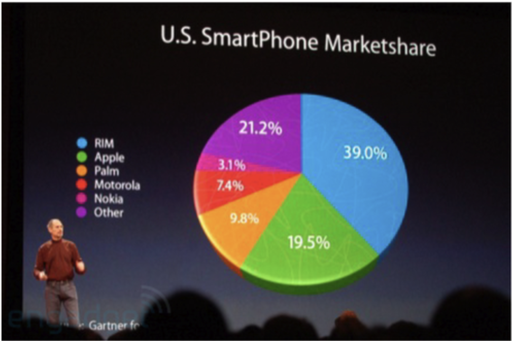

#### What's wrong with the image above?
The 3D aspect of the pie chart means actual wedge sizes are skewed, in this case misleading you to believe Apple has the second most share when it has the third.

Check out https://viz.wtf/ for when data viz goes wrong. And https://datavizproject.com/ for data vis inspiration 

# Python data visualisation overview

- The **pandas** `.plot()` method allows us to quickly produce **common plot types** from **DataFrames**
    - pandas does this using the matplotlib plotting library
- **matplotlib** provides extensive **options** and **control** over all aspects of a plot  
    ... but has a steeper learning curve and produces less attractive plots by default

- **seaborn** facilitates the creation of attractive statistical graphics
    - also built on top of matplotlib
    - easily to apply **themes** and colour **palettes** for styling
    - additional plot types, such as **heat maps** and **violin plots**

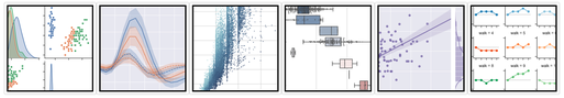

#### The role of matplotlib

- pandas and seaborn simplify the creation of attractive **matplotlib figures** for common plot types
- we can subsequently use matplotlib to **modify specific elements** of a given matplotlib figure


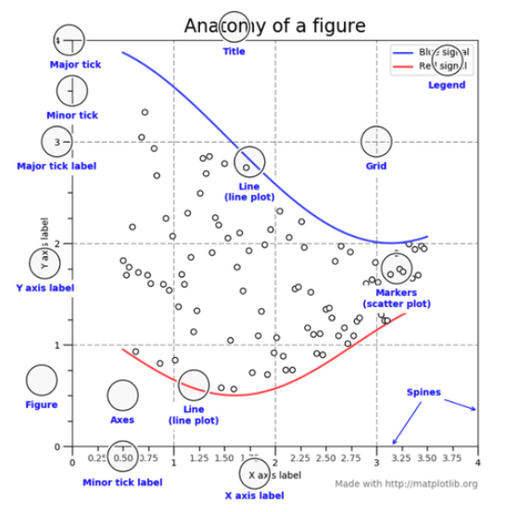

Prior to creating the previous example plots with pandas `.plot()`, the following code was run in a cell excluded from the presentation:

```python

import seaborn as sns
sns.set(palette='deep')

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

```

The seaborn `.set()` method allows us to [set various aesthetic parameters](https://seaborn.pydata.org/generated/seaborn.set.html) for all matplotlib figures subsequently shown in the notebook.  

Numerous [palettes](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette) are available, for example:
    
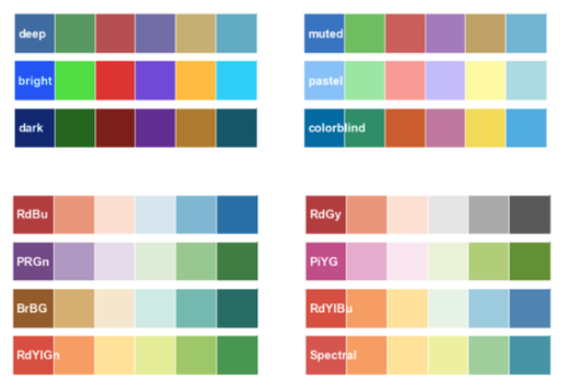

`matplotlib_axes_logger.setLevel()` prevents a warning being shown (logged) due to seaborn not providing the color palette in the format now preferred by matplotlib.
- This highlights how issues can arise when packages have **dependencies** which are being updated independently

### Plotting with pandas

```python
df.plot(x='GDP', y='Electricity - consumption(kWh)', kind='scatter');
```

We have seen in the previous slides various examples of plots we can make with the pandas `.plot()` method. 

- `x` and `y` parameters allow us to specify a **column** of our DataFrame for each axis
- `kind` allows us to define what type of plot we want to create

- The [documentation](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html) provides details on what **parameters** and **arguments** can be used
- Most of these parameters map directly to an underlying matplotlib parameter of the same name

```python
df.plot.scatter(x='GDP', y='Electricity - consumption(kWh)')
```


Instead of using the `kind` parameter with the `.plot()` method, alternatively we can create the same plot using the corresponding method in the format shown above.

```python
films.boxplot(by='Awards', column='Popularity')
```


**Box plots** `.boxplot()` and **histograms** `.hist()` have dedicated DataFrame methods, because their parameters differ from the other plot types.

For all plots produced using pandas, parameters available in the underlying ``matplotlib.pyplot`` method used to create it can also be passed to the pandas method; these can be found in the [pyplot documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.html).

#### Plotting pandas Series

In [ ]:
length = films.groupby('Subject')['Length']\
              .agg(['count', 'mean'])\
              .sort_values(by='count', ascending=False)\
              .head(5) #to keep only the 5 most popular Subjects

length['mean'].sort_values().plot.barh();

```python
    df.groupby(categorical_variable)[numerical_variable]\
      .agg([stats_of_interest])
```
- We used the above structure to aggregate the `Length` values for each `Subject` group
- `.sort_values(by='count')` and `.head(5)` were used to extract the five `Subject` groups with the highest `count`
- Finally we used `sort_values()` on the `length['mean']` Series to give our `barh` chart a more meaningful order
    


- When plotting a Series we do not need to provide `x` and `y` parameters
- The `.plot.barh()` method produces a **horizontal bar chart**

*As per this example, the manipulation of our data into the required state is often more complex than the creation of the plot.*


### Modifying plots using matplotlib

In [ ]:
import matplotlib.pyplot as plt

- matplotlib itself has **several interfaces** by which plots can be produced
- The `.pyplot` interface is the one used by pandas, and is intended for simpler plots
- pyplot allows us to make changes to the **current plot**
    - The current plot is determined automatically (although can be overriden manually)
    - Use pyplot code in the same cell as the pandas `.plot()` method call

In [ ]:
df.plot.scatter(x='Life expectancy at birth(years)', y='Birth rate(births/1000 population)')
plt.title('Life Expectancy vs Birth Rate for Countries of the World')
plt.arrow(40, 40, 20, -15, color='orange', head_width=2)
plt.ylim(bottom=0, top=60)
plt.savefig('countries.png');

We have used matplotlib to:
- Add a **title**   
    `plt.title()`
- Add an **arrow**   
    `plt.arrow()`
- Modify **y-axis limits**  
    `plt.ylim()`
- **Save an image** of our plot (figure)  
    `plt.savefig()`

See the [documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) for more pyplot methods. 

### Plotting with seaborn

In [ ]:
import seaborn as sns

sns.regplot(x='Electricity - consumption(kWh)', y='GDP',data=df);

`.regplot()` produces a scatter plot with a **line of best fit** from a **linear regression** model, with the shaded area indicating the **confidence interval**

- `x` and `y` parameters are used as with pandas `.plot()`
- the DataFrame containing `x` and `y` is passed to the `data` parameter

Regplot reference on [Seaborn website](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot)

### Violin plots

In [ ]:
sns.violinplot(x='Awards', y='Length', scale='count', data=films);

#### Violin plots

- Similar to box plots, except that the distribution is shown using an **estimation of the density of data points** at each value rather than standard descriptive statstics
    - Small sample sizes may result in deceptively smooth shapes
- `scale='count'` is used here to communicate the **difference in sample size** between the two groups
    - The area of the shape is equivalent to the relative size of each group

### Pair plots

In [ ]:
sns.pairplot(x_vars=['Birth rate(births/1000 population)', 'Death rate(deaths/1000 population)', \
                     'Unemployment rate(%)', 'Military expenditures - percent of GDP(%)'], \
             y_vars=['GDP - per capita', 'Life expectancy at birth(years)'], \
             hue='Income group', 
             height=3.5,
             data=df);

#### Pair plots

- `.pairplot()` facilitates creation of numerous scatter plots to **compare relationships**
- The `hue` parameter allows us to show **categorical features** using colour
- Calling without specifying `x_vars` and `y_vars` will create plots for **all combinations of numerical columns** in the DataFrame
    - This may be computationally heavy and take a long time!

Explore the [seaborn gallery](https://seaborn.pydata.org/examples/index.html) for more examples of the plots it can produce.

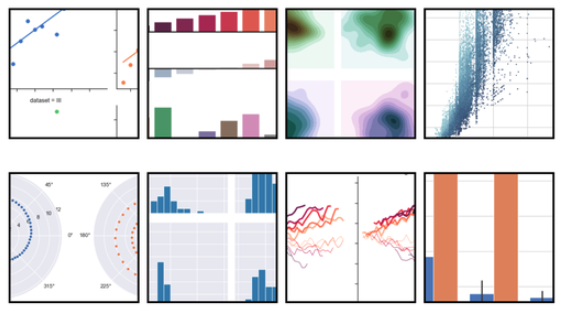

### Heat maps

Heat maps allow us to see relationships between three variables:

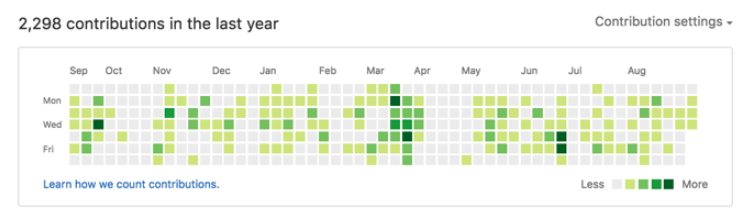

Source: [GitHub](https://help.github.com/en/github/setting-up-and-managing-your-github-profile/viewing-contributions-on-your-profile#contributions-calendar)

The x- and y- axes should either be:
- **discrete numerical variables** (e.g. year)
- **categorical variables** with a meaningful order (day of week)
    
The variable determining the **colouration** needs to be **numerical** and is typically used to represent a **magnitude** or **frequency**.

In [ ]:
feat = films[(films['Length'] >= 60) & (films['Length'] <= 120) \
             & (films['Popularity'] >= 0)].copy()

feat['Length band'] = ((feat['Length'] // 10) * 10).astype(int)
feat['Popularity band'] = ((feat['Popularity'] // 10) * 10).astype(int)

len_pop = feat.groupby(['Popularity band', 'Length band']).size()\
         .unstack().sort_index(ascending=False)
len_pop

We created a subset of `films` called `feat` which includes films of a `Length >= 60 & <=120` `&` `Popularity >= 0` 
- films of `Length` outside this range are too few to be informative on the heatmap
- `Popularity >= 0` ensures we only have films which have a `Popularity` value

- `(([column] // 10) * 10).astype(int)` on `Length` and `Popularity` allows us to group these values, rounded down to the nearest `10`
- `.groupby()` with the two created columns and `.size()` gives us the number of entries in each group (this is an alternative to `.count()`, with which we would have to **specify a column** (which in this case would be arbitrary) from the DataFrame to count)

- `.unstack()` transposes the second column in the MultiIndex into **separate data columns**
- `sort_index()` sorts the resulting DataFrame by the **index values**, with `ascending=False` putting **higher values first**

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(len_pop);

- As we have seen previously, most of the code is for manipulation of the data into an **appropriate format**, rather than for the creation of the plot itself 
- Here we have used the **pyplot** `.figure()` method *before* the seaborn plotting method to set the `figsize` for the current figure (and make it larger than the default)

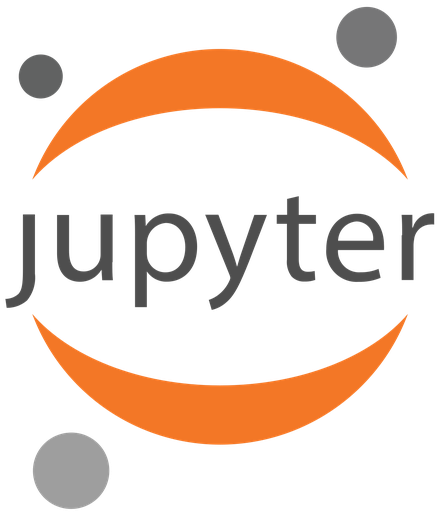

Now open the following workbook: `intro-vis-workbook.ipynb`

# Overview of Visualisation Essentials 

In [ ]:
import pandas as pd
df = pd.read_csv('data/films.csv')

`pandas` has a `.plot()` method that you can call on `DataFrame` and `Series` to generate plots quickly.

In order to get the plot you want:
1. Process the data to be in the right format
    * Filter and select only the columns and rows you want with `loc`
    * Use `groupby`, `apply` etc... to create aggregations before plotting
2. Use the parameters of `plot()`
3. Call matplotlib/seaborn functions for more customisation

## Scatter plots

* Specify name of columns `x` and `y` to use.
- They work better for **continuous** variables.

In [ ]:
df.plot(x='Length', y='Popularity', kind='scatter', title="Popularity vs Length")

## Histograms

* Select the column (`pd.Series`) of interest first.
* The number of bins can have a big impact on your interpretation!

In [ ]:
df['Popularity'].plot(kind='hist', bins=10)

## Bar charts

* Transform your dataset to have the labels you want on `x` axis to be your index
* Select the column (with numerical values!) you want as `y`
* If you want a bar plot showing how many items you have per group, the best is to use:
    * `value_counts()`: if you just want to count items
    * `groupby`: for more advanced aggregations like sum(), mean(), etc..

### Example 1: distribution of subjects

In [ ]:
subjects = df["Subject"].value_counts()
subjects

In [ ]:
subjects.plot(kind="bar")

### Example 2: Number of awards per subject

In [ ]:
# First we create a new column: "has award"

In [ ]:
msk_award = df["Awards"] == "Yes"
df.loc[msk_award, "Has award"] = 1
df.loc[~msk_award, "Has award"] = 0

In [ ]:
awards = df.groupby("Subject")["Has award"].sum()
awards.sort_values(inplace=True, ascending=False)
awards

In [ ]:
awards.plot(kind="bar", title="Awards per subject")

### Example 3 (more advanced): 
You can have multiple bars per label. To do so select multiple columns (make sure they are comparable)

In [ ]:
# Using groupby will add both subject and awards as index.
genres = df.groupby(['Subject', 'Awards'])['Popularity'].mean()
genres.head()

In [ ]:
# We use unstack so the index "Awards" is moved to columns
genres_awards = genres.unstack()
genres_awards.head()

In [ ]:
# Pandas does the rest!
genres_awards.sort_values(by='No', ascending=False).plot(kind='bar');

## Box plots

Useful to show difference of the distribution of a numerical value for given categories

### Example: distribution of popularity between Antonio Banderas and Robin Willams

In [ ]:
msk_actors = df["Actor"].isin(["Banderas, Antonio", "Williams, Robin"])

In [ ]:
df.loc[msk_actors].boxplot(by="Actor", column="Popularity")

## Pie charts

They expect similar format as bar plots, but will plot it as a pie!

In [ ]:
awards.plot(kind='pie')

# Matplotlib and seaborn

They can be used when you need more customisation or advanced plots.

Note: whether you use `pandas`, `seaborn` or `maplotlib`, the underlying plot will be in matplotlib format. So you can always call `maptplotlib` commands on top of it.

### Modifying plots using matplotlib

In [ ]:
# Make sure you always import matplotlib.pyplot - standard is to call it plt
import matplotlib.pyplot as plt

Here we start with a simple scatter plot, and use matplotlib `plt` commands to modify certain components and save the figure.

In [ ]:
plt.set_cmap("Dark2")
df.plot(x='Length', y='Popularity', kind='scatter')
plt.title("Popularity vs Length")
plt.ylim(bottom=0, top=60)
plt.xlabel("Movie length")
plt.grid()
plt.savefig('movies.png')

You can also use matplotlib to change the theme for all your figures.

Find all themes here: https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

In [ ]:
# For R lovers
plt.matplotlib.style.use("ggplot")

In [ ]:
plt.set_cmap("Dark2")
df.plot(x='Length', y='Popularity', kind='scatter')
plt.title("Popularity vs Length")
plt.ylim(bottom=0, top=60)
plt.xlabel("Movie length")
plt.grid()
plt.savefig('movies.png')

### Plotting with seaborn

In [ ]:
import seaborn as sns

sns.regplot(x='Length', y='Popularity',data=df);

### Violin plots

In [ ]:
sns.violinplot(x='Awards', y='Length', scale='count', data=df);

### Pair plots

In [ ]:
sns.pairplot(x_vars=['Length', 'Year', 'Popularity'],
             y_vars=['Length', 'Year', 'Popularity'],
             hue='Awards', 
             data=df);